### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [1]:
import pandas as pd

path=r"C:\Users\harit\OneDrive\Desktop\prognosAI-Infosys-intern-project\data\train_FD001.txt"
cols = ['sno','cycle','setting1','setting2','setting3'] + [f's{i}' for i in range(1,22)]
df = pd.read_csv(path, sep='\s+', header=None, names=cols)

print("Shape of the DataFrame:", df.shape)
print("DataFrame info",df.info())
print("First 5 rows in a DataFrame",df.head())


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\harit\AppData\Local\Temp\ipykernel_26712\1716104135.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep='\s+', header=None, names=cols)


Shape of the DataFrame: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

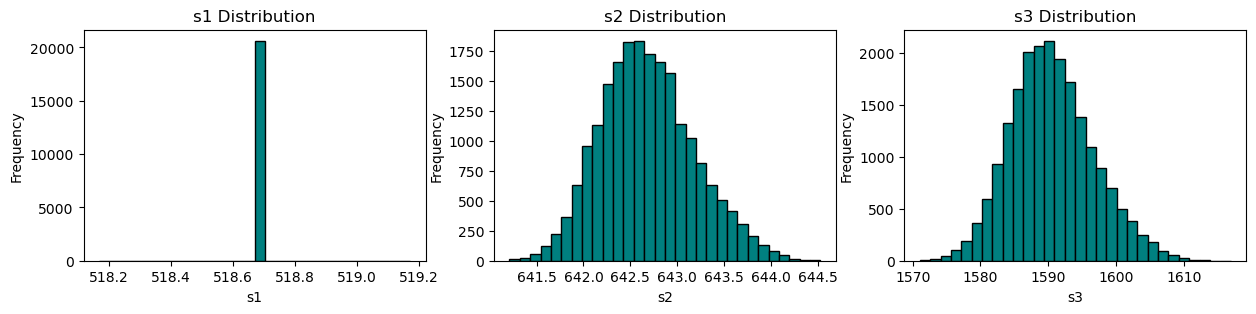

Missing values per column: sno         0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
# Plot histograms for three sensors
sensors = ['s1', 's2', 's3']


plt.figure(figsize=(15, 3))  

for i, s in enumerate(sensors):
    plt.subplot(1, 3, i + 1)  
    plt.hist(df[s], bins=30, color='teal', edgecolor='black')
    plt.title(f'{s} Distribution')
    plt.xlabel(s)
    plt.ylabel('Frequency')


plt.show()
print("Missing values per column:",df.isnull().sum())

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [ ]:
df['s2_mean_by_engine','s2_std_by_engine'] = df.groupby('sno')['s2'].transform('mean','std')

df['s2_roll_mean_5'] = (
    df.groupby('sno')['s2']
      .rolling(window=5, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

print(df[['sno', 'cycle', 's2', 's2_mean_by_engine', 's2_std_by_engine', 's2_roll_mean_5']].head())

   sno  cycle      s2  s2_mean_by_engine  s2_std_by_engine  s2_roll_mean_5
0    1      1  641.82         642.621042          0.486795      641.820000
1    1      2  642.15         642.621042          0.486795      641.985000
2    1      3  642.35         642.621042          0.486795      642.106667
3    1      4  642.35         642.621042          0.486795      642.167500
4    1      5  642.37         642.621042          0.486795      642.208000


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [9]:
from sklearn.preprocessing import StandardScaler
sensor_cols = [
    col for col in df.columns
    if isinstance(col, str) and col.startswith('s')
    and col not in ['sno', 'setting1', 'setting2', 'setting3']
]

scaler=StandardScaler()
df_scaled = df.copy()
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])
print("scaled dataframe:",df_scaled.head())
print("\n Mean close to 0:\n", df_scaled[sensor_cols].mean().round(4).head())
print("\n Std close to 0:\n", df_scaled[sensor_cols].std().round(4).head())



scaled dataframe:    sno  cycle  setting1  setting2  setting3   s1        s2        s3  \
0    1      1   -0.0007   -0.0004     100.0  0.0 -1.721725 -0.134255   
1    1      2    0.0019   -0.0003     100.0  0.0 -1.061780  0.211528   
2    1      3   -0.0043    0.0003     100.0  0.0 -0.661813 -0.413166   
3    1      4    0.0007    0.0000     100.0  0.0 -0.661813 -1.261314   
4    1      5   -0.0019   -0.0002     100.0  0.0 -0.621816 -1.251528   

         s4            s5  ...           s16       s17  s18  s19       s20  \
0 -0.925936 -1.776357e-15  ... -1.387779e-17 -0.781710  0.0  0.0  1.348493   
1 -0.643726 -1.776357e-15  ... -1.387779e-17 -0.781710  0.0  0.0  1.016528   
2 -0.525953 -1.776357e-15  ... -1.387779e-17 -2.073094  0.0  0.0  0.739891   
3 -0.784831 -1.776357e-15  ... -1.387779e-17 -0.781710  0.0  0.0  0.352598   
4 -0.301518 -1.776357e-15  ... -1.387779e-17 -0.136018  0.0  0.0  0.463253   

        s21  s2_mean_by_engine  s2_std_by_engine  s2_roll_mean_5  \
0  1.194427 

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.